In [109]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from umap import UMAP
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
import nltk
import os
import sklearn

In [3]:
# Télécharger les ressources NLTK nécessaires
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Maison\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Maison\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [ ]:
# charger les données
df = pd.DataFrame()
for file in os.listdir("data"):
    if file == "restaurants.csv":
        continue

    # Charger les données
    if df.empty:
        df = pd.read_csv(f'data/{file}')
    else:
        df = pd.concat([df, pd.read_csv(f'data/{file}')], axis=0)

In [104]:
# Prétraitement des avis
df['tokens'] = df['review_text'].apply(lambda x: word_tokenize(x.lower()))

# Entraîner le modèle Word2Vec
model = Word2Vec(sentences=df['tokens'], vector_size=100, window=5, min_count=1, workers=4)


# Fonction pour obtenir le vecteur moyen d'un avis
def get_avg_vector(tokens):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(100)
    return np.mean(vectors, axis=0)

# Calculer les vecteurs moyens pour chaque restaurant
df['avg_vector'] = df['tokens'].apply(get_avg_vector)

# Agréger les vecteurs par restaurant
restaurant_vectors = df.groupby('id_resto')['avg_vector'].apply(lambda x: np.mean(list(x), axis=0))

e:\Documents\Data Science\Projets\Python\envs\env-nlp-trip-advisor\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Documents\Data Science\Projets\Python\envs\env-nlp-trip-advisor\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
e:\Documents\Data Science\Projets\Python\envs\env-nlp-trip-advisor\Lib\site-packages\umap\umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


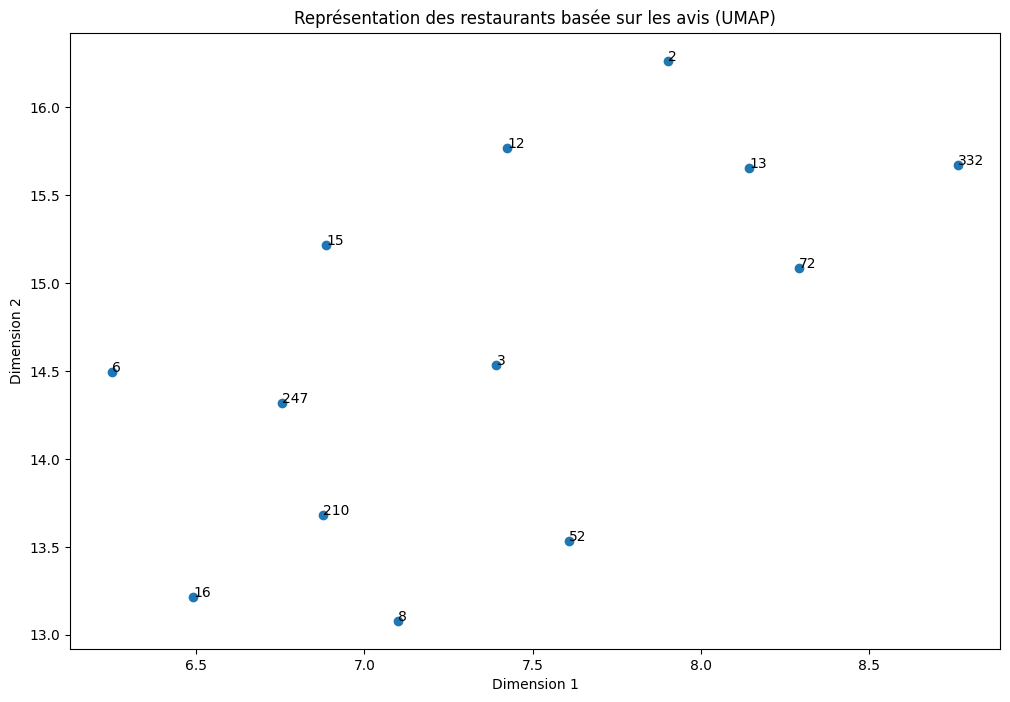

In [108]:
# Réduction de dimensionnalité avec UMAP
umap = UMAP(n_components=2, random_state=42)
restaurant_coords = umap.fit_transform(np.array(restaurant_vectors.tolist()))

# Visualisation
plt.figure(figsize=(12, 8))
plt.scatter(restaurant_coords[:, 0], restaurant_coords[:, 1])

for i, restaurant in enumerate(restaurant_vectors.index):
    plt.annotate(restaurant, (restaurant_coords[i, 0], restaurant_coords[i, 1]))

plt.title("Représentation des restaurants basée sur les avis (UMAP)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()


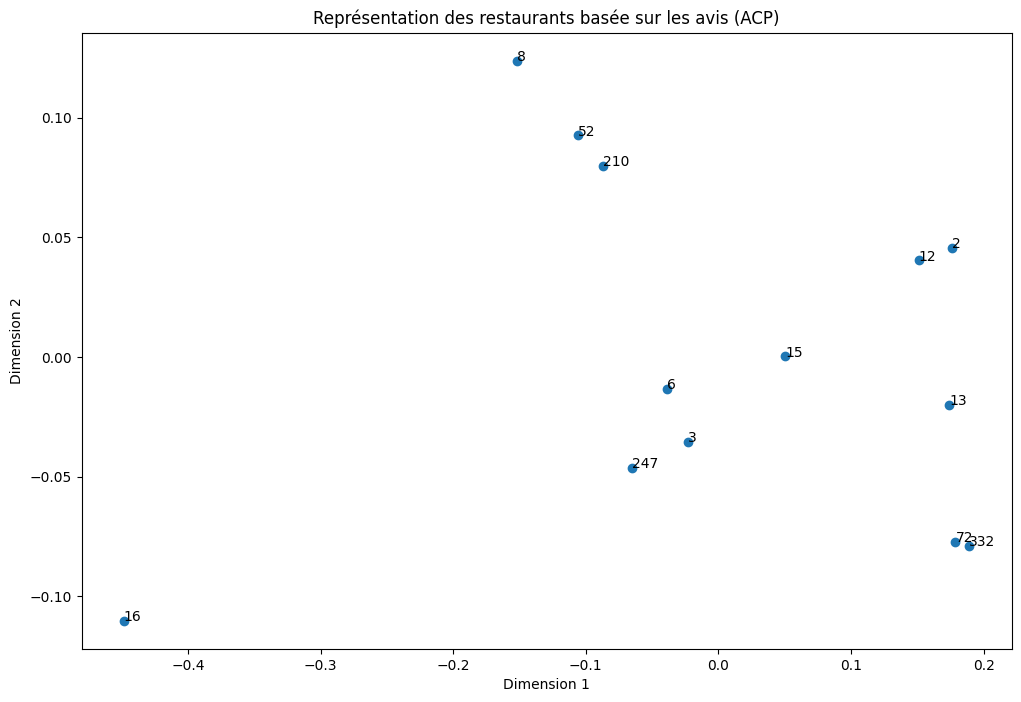

In [112]:
# Réduction de dimensionnalité avec ACP
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
restaurant_coords = pca.fit_transform(np.array(restaurant_vectors.tolist()))

# Visualisation
plt.figure(figsize=(12, 8))
plt.scatter(restaurant_coords[:, 0], restaurant_coords[:, 1])

for i, restaurant in enumerate(restaurant_vectors.index):
    plt.annotate(restaurant, (restaurant_coords[i, 0], restaurant_coords[i, 1]))

plt.title("Représentation des restaurants basée sur les avis (ACP)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
